In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

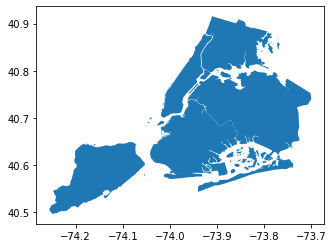

In [6]:
# LOAD SHAPEFILE
fp = 'NY_shapefile/geo_export_8235ee87-0857-4c51-9a6b-2610cf773afa.shp'
map_df = gpd.read_file(fp)

fig = map_df.plot()

In [ ]:
# LOAD DATA
df = pd.read_csv('NY_shapefile/NY_311_requests.csv')

# Group by complaints
df_top_compl = df.groupby('Borough')['Complaint Type'].apply(lambda x: x.value_counts().head(1)).reset_index()
df.shape

In [ ]:
# MERGE BOTH FILES
map_df['Borough'] = map_df['boro_name'].apply(lambda x: x.upper())

data_df = pd.merge(map_df, df_top_compl, how='left', on='Borough')

data_df['level_1'].fillna(value='No data', inplace=True) # Not sure if necessary


In [ ]:
# CREATE COLOR MAP
keys = list(data_df['level_1'].unique())
color_range = list(np.linspace(0, 1, len(keys), endpoint=False))
colors = [cm.tab20b(x) for x in color_range]
color_dict = dict(zip(keys, colors))
color_dict['No data'] = 'lightgray'

# CREATE SUBPLOT GRID
row_count = data_df['level_1'].nunique()
ax_list = []
for i in range(row_count+1):
    ax_list.append('ax' + str(i+1))
ax_string = ', '.join(ax_list)

fig, (ax_string) = plt.subplots(row_count, 4)

# CREATE LEGEND
row_counter = 0
for i in data_df['level_1'].unique(): 
    plt.subplot2grid((row_count,4),(row_counter,0))
    plt.pie([1],labels=[i],radius=0.4, colors=[color_dict[i]])
    plt.axis('off')
    row_counter += 1


# CREATE PLOT
ax1 = plt.subplot2grid((row_count,4),(0,1), rowspan=row_count, colspan=3)
for index, row in data_df.iterrows():
    plot = data_df[data_df['boro_code'] == row['boro_code']].plot(color=color_dict[row['level_1']], ax=ax1)
    ax1.axis('off')
    ax1.set_title('Most frequent 311-service requests in NYC', size=10)


# Create an annotation for the data source
annotation = ax1.annotate('Source: nycopendata.com',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=8, color='#555555')

fig.savefig('NYC_requests.png', dpi=300, bbox_inches = "tight")
